# 1-資料集
[Scikit-Learn資料集](https://scikit-learn.org/stable/datasets/index.html#toy-datasets)

# 2-波士頓房價數據集 (迴歸問題):
CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

MEDV：自住房中位数价格，单位是千元

In [15]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
df = pd.DataFrame(boston["data"],columns=boston["feature_names"])
df["ans"] = boston["target"] # 加入(資料答案)=(鳶尾花品種名稱)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(boston["data"],boston["target"],test_size=0.1) 
reg = DecisionTreeRegressor(max_depth=5) # 建立決策樹
reg.fit(x_train,y_train) # 開始訓練

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [17]:
from sklearn.metrics import accuracy_score
pre = reg.predict(x_test)
pre

array([15.80384615, 34.54210526, 22.8974359 ,  9.33548387, 22.8974359 ,
       20.60594059, 15.80384615, 22.8974359 , 44.53333333, 15.80384615,
       27.2       , 20.05      , 20.60594059, 15.80384615, 30.72333333,
       22.8974359 , 15.80384615, 22.8974359 , 30.7       , 20.60594059,
       22.8974359 , 20.60594059, 20.60594059, 27.2       , 15.80384615,
       13.84137931, 13.64285714, 20.60594059, 20.60594059, 20.60594059,
       27.2       , 22.8974359 , 20.60594059, 20.60594059, 20.60594059,
       34.54210526, 47.83571429, 20.60594059, 20.60594059, 22.8974359 ,
       20.60594059,  9.33548387, 22.8974359 , 20.60594059, 15.80384615,
       22.8974359 , 22.8974359 , 20.60594059, 22.8974359 , 22.8974359 ,
       20.60594059])

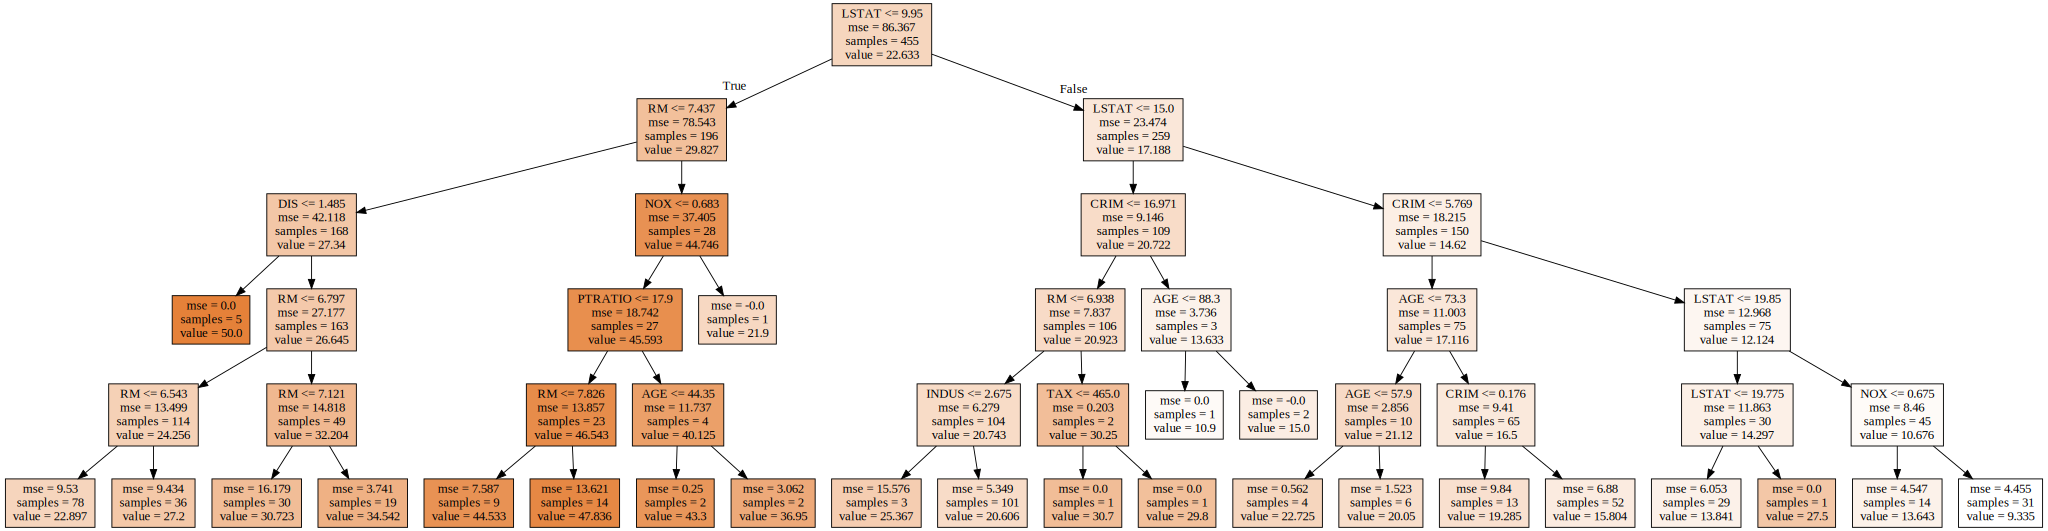

In [18]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(reg,
                    feature_names=boston["feature_names"],
                    filled=True)
graphviz.Source(g)

In [19]:
# if TAX <= 269.0:
#     mse = 5.38     = Mean-Square Error
#     samples = 17   = 樣本數
#     value = 30.241 = 回傳值
# else:
    

# 3-評價模型的使用時機

1. right = 正確答案
2. pre = 預測結果
3. mean = 平均值

## (1)Mean-Square Error(用於單個模型)
$ MSE = \frac{1}{n}\sum_{i=1}^n{(x_i-\mu)^2} $
## (2)Mean-Absolute Error
$ MAE = \frac{1}{n}\sum_{i=1}^n{|x_i-\mu|} $

## (3)[$ r^2-Score $](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2_score#sklearn.metrics.r2_score)
$ a=\sum{(pre-right)^2} $

$ b=\sum{(right-mean)^2} $

$ r^2=\frac{a}{b} $
1. if $ r^2=0 $,a=0(pre=right),(最佳)
2. if $ r^2=1 $,a=b(pre=mean),(瞎猜)
3. if $ r^2<=0.5 $,可接受
4. if $ r^2>0.5 $,不可接受

[其他評價迴歸模型](https://blog.csdn.net/Softdiamonds/article/details/80061191)

[其他模型](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [20]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
print("pre:",pre)
print("r2_score = ",r2_score(y_test,pre))

pre: [15.80384615 34.54210526 22.8974359   9.33548387 22.8974359  20.60594059
 15.80384615 22.8974359  44.53333333 15.80384615 27.2        20.05
 20.60594059 15.80384615 30.72333333 22.8974359  15.80384615 22.8974359
 30.7        20.60594059 22.8974359  20.60594059 20.60594059 27.2
 15.80384615 13.84137931 13.64285714 20.60594059 20.60594059 20.60594059
 27.2        22.8974359  20.60594059 20.60594059 20.60594059 34.54210526
 47.83571429 20.60594059 20.60594059 22.8974359  20.60594059  9.33548387
 22.8974359  20.60594059 15.80384615 22.8974359  22.8974359  20.60594059
 22.8974359  22.8974359  20.60594059]
r2_score =  0.8797240381584202


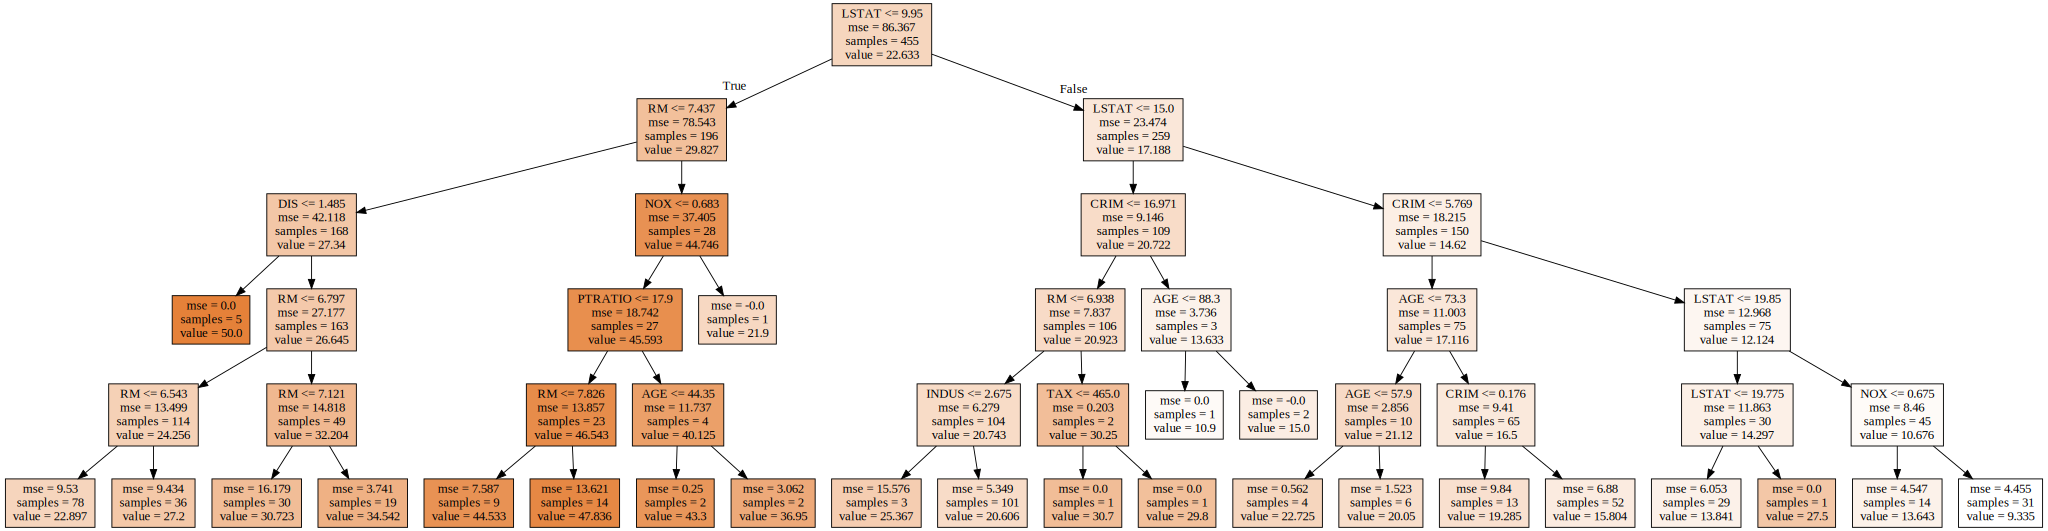

In [21]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(reg,
                    feature_names=boston["feature_names"],
                    filled=True) 
# g = export_graphviz(reg,
#                     feature_names=boston["feature_names"],
#                     filled=True,
#                     max_depth=3) # max_depth: 指定tree的顯示深度
graphviz.Source(g)

In [23]:
# 保存成(pdf檔)
graphviz.Source(g).render('./data/output-graph', view=False)

'./data\\output-graph.pdf'

# 4-評價迴歸模型
1. explained_variance_score
2. max_error
3. mean_absolute_error
4. mean_squared_error
5. mean_squared_log_error
6. median_absolute_error
7. r2_score
8. mean_poisson_deviance
9. mean_gamma_deviance
10. mean_tweedie_deviance

In [24]:
from sklearn import metrics
import numpy as np

## 4.1-Explained Variance Score(可解釋變異)

y=正確

$ \tilde{y}= $預測

$ \bar{y}=\frac{1}{n}\sum_{i=1}^n{y_i} $

Var$ (y)=\sum_{i=1}^n{(y_i-\bar{y})^2} $

explained_variance_score$ (y,\tilde{y}) = 1-\frac{Var(y-\tilde{y})}{Var(y)} $

In [25]:
def mean(data):
    return sum(data)/len(data)
def var(data):
    result = 0
    m = mean(data)
    for i in range(data.shape[0]):
        result += (data[i]-m)**2
    return result
def my_explained_variance_score(right,pre):
    return 1-var(right-pre)/var(right)
print("my_explained_variance_score = ",my_explained_variance_score(y_test,pre))
print("explained_variance_score = ",metrics.explained_variance_score(y_test,pre))

my_explained_variance_score =  0.8834952158942015
explained_variance_score =  0.8834952158942015


## 4.2-Max Error(最大誤差)

y=正確

$ \tilde{y}= $預測

$ \text{Max_Error}(y,\tilde{y})=\max_{i=1,...,n}|y_i-\tilde{y}_i| $

In [26]:
def my_max_error(right,pre):
    result = 0
    for i in range(right.shape[0]):
        result = max(result,abs(right[i]-pre[i]))
    return result
print("my_max_error = ",my_max_error(y_test,pre))
print("max_error = ",metrics.max_error(y_test,pre))

my_max_error =  7.703846153846156
max_error =  7.703846153846156


## 4.3Mean Absolute Error(平均絕對誤差)

y=正確

$ \tilde{y}= $預測

$ \text{MAE}(y, \hat{y}) = \frac{1}{n} \sum_{i=0}^{n-1} \left| y_i - \hat{y}_i \right| $

In [27]:
def my_MAE(right,pre):
    result = 0
    for i in range(right.shape[0]):
        result+=abs(right[i]-pre[i])
    return result/right.shape[0]
print("my_MAE = ",my_MAE(y_test,pre))
print("MAE = ",metrics.mean_absolute_error(y_test,pre))

my_MAE =  2.1758919166208734
MAE =  2.175891916620874


## 4.4-Mean Square Error(均方誤差)

y=正確

$ \tilde{y}= $預測

$ \text{MSE}(y, \hat{y}) = \frac{1}{n} \sum_{i=0}^{n- 1} (y_i - \hat{y}_i)^2 $

In [28]:
def my_MSE(right,pre):
    result = 0
    for i in range(right.shape[0]):
        result+=(right[i]-pre[i])**2
    return result/right.shape[0]
print("my_MSE = ",my_MSE(y_test,pre))
print("MSE = ",metrics.mean_squared_error(y_test,pre))

my_MSE =  7.958601667463509
MSE =  7.958601667463513


## 4.5-Mean Squared Logarithmic Error(均方對數誤差)

y=正確

$ \tilde{y}= $預測

$ \text{MSLE}(y, \hat{y}) = \frac{1}{n} \sum_{i=0}^{n - 1} (\log_e (1 + y_i) - \log_e (1 + \hat{y}_i) )^2 $

In [29]:
def my_MSLE(right,pre):
    result = 0
    for i in range(right.shape[0]):
        result+=(np.log(1+right[i])-np.log(1+pre[i]))**2
    return result/right.shape[0]
print("my_MSLE = ",my_MSLE(y_test,pre))
print("MSLE = ",metrics.mean_squared_log_error(y_test,pre))

my_MSLE =  0.026798834175528703
MSLE =  0.026798834175528707


## 4.6-Median Absolute Error(絕對中位誤差)

y=正確

$ \hat{y}= $預測

median = 取中位數

$ \text{MedAE}(y, \hat{y}) = \text{median}_{i=1,...,n}| y_i - \hat{y}_i | $

In [30]:
def my_MedAE(right,pre):
    result = []
    for i in range(right.shape[0]):
        result.append(abs(right[i]-pre[i]))
    return np.median(np.asarray(result))
print("my_MedAE = ",my_MedAE(y_test,pre))
print("MedAE = ",metrics.median_absolute_error(y_test,pre))

my_MedAE =  1.903846153846155
MedAE =  1.903846153846155


## 4.7-Coefficient of Determination(決定系數)

y=正確

$ \hat{y}= $預測

$ \bar{y}=\frac{1}{n}\sum_{i=1}^n{y_i} $

$ R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}  $

In [31]:
def my_r2(right,pre):
    a = 0
    b = 0
    for i in range(right.shape[0]):
        a += (right[i]-pre[i])**2
        b += (right[i]-np.mean(right))**2
    return 1-a/b
print("my_r2 = ",my_r2(y_test,pre))
print("r2_score = ",metrics.r2_score(y_test,pre))

my_r2 =  0.8797240381584203
r2_score =  0.8797240381584202


## 4.8-Mean Poisson Deviances

y=正確

$ \hat{y}= $預測

$ \text{Poisson}(y,\hat{y})=\sum_{i=0}^{n - 1}2(y_i \log(y/\hat{y}_i) + \hat{y}_i - y_i) $

In [34]:
def my_Poisson(right,pre):
    result = 0
    for i in range(right.shape[0]):
        result += 2*(right[i]*np.log(right[i]/pre[i])+pre[i]-right[i])
    return result/right.shape[0]
print("my_Poisson = ",my_Poisson(y_test,pre))
print("Poisson = ",metrics.mean_poisson_deviance(y_test,pre))

my_Poisson =  0.43423864630495457
Poisson =  0.4342386463049543


## 4.9-Mean Gamma Deviances

y=正確

$ \hat{y}= $預測

$ \text{Gamma}(y,\hat{y})=\sum_{i=0}^{n - 1}2(\log(\hat{y}_i/y_i) + y_i/\hat{y}_i - 1) $

In [35]:
def my_Gamma(right,pre):
    result = 0
    for i in range(right.shape[0]):
        result += 2*(np.log(pre[i]/right[i])+right[i]/pre[i]-1)
    return result/right.shape[0]
print("my_Gamma = ",my_Gamma(y_test,pre))
print("Gamma = ",metrics.mean_gamma_deviance(y_test,pre))

my_Gamma =  0.02858829682295868
Gamma =  0.02858829682295868


## 4.10-Mean Poisson, Gamma, and Tweedie deviances

y=正確

$ \hat{y}= $預測

$ \begin{split}\text{D}(y, \hat{y}) = \frac{1}{n}
\sum_{i=0}^{n - 1}
\begin{cases}
(y_i-\hat{y}_i)^2, & \text{for }p=0\text{ (Normal)}\\
2(y_i \log(y/\hat{y}_i) + \hat{y}_i - y_i),  & \text{for}p=1\text{ (Poisson)}\\
2(\log(\hat{y}_i/y_i) + y_i/\hat{y}_i - 1),  & \text{for}p=2\text{ (Gamma)}\\
2\left(\frac{\max(y_i,0)^{2-p}}{(1-p)(2-p)}-
\frac{y\,\hat{y}^{1-p}_i}{1-p}+\frac{\hat{y}^{2-p}_i}{2-p}\right),
& \text{otherwise}
\end{cases}\end{split} $

In [36]:
def my_MTD(right,pre,power=0):
    result = 0
    for i in range(right.shape[0]):
        if power==0:
            result += (right[i]-pre[i])**2
        elif power==1:
            result += 2*(right[i]*np.log(right[i]/pre[i])+pre[i]-right[i])
        elif power==2:
            result += 2*(np.log(pre[i]/right[i])+right[i]/pre[i]-1)
        else:
            result += 2*(max(right[i],0)**(2-p)/((1-p)*(2-p))-right[i]*(pre[i]**(1-p))/(1-p)+(pre[i]**(2-p))/(2-p))
    return result/right.shape[0]
print("my_MTD = ",my_MTD(y_test,pre,power=0))
print("MTD = ",metrics.mean_tweedie_deviance(y_test,pre,power=0))

my_MTD =  7.958601667463509
MTD =  7.958601667463513
